In [3]:
!pip install kagglehub

In [75]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("yingwurenjian/chicago-divvy-bicycle-sharing-data")

print("Path to dataset files:", path)

Path to dataset files: /home/jovyan/.cache/kagglehub/datasets/yingwurenjian/chicago-divvy-bicycle-sharing-data/versions/1


In [76]:
import pandas as pd
df = pd.read_csv(path+"/data.csv", nrows=1_000_000)

In [77]:
from sklearn.model_selection import train_test_split

df, df_final_holdout = train_test_split(df, test_size=0.5, random_state=42)

In [78]:
df_final_holdout = df_final_holdout.reset_index()

In [79]:
df = df.reset_index()
x = df.drop(columns = ['tripduration'])
y = df['tripduration']

In [80]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=1/3, random_state=42
)


In [81]:
x_train = x_train.reset_index()
# this the data that will be used to train the data 


In [52]:
x_train

,level_0,index,trip_id,year,month,week,day,hour,usertype,gender,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,135822,351158,1571305,2014,5,19,0,6,Subscriber,Male,...,236,Sedgwick St & Schiller St,41.907576,-87.638517,15.0,98,LaSalle St & Washington St,41.882664,-87.632530,15.0
1,493709,658250,2718802,2014,7,30,1,12,Subscriber,Female,...,49,Dearborn St & Monroe St,41.881320,-87.629521,23.0,164,Franklin St & Lake St,41.885837,-87.635500,23.0
2,456256,117949,2093127,2014,6,24,5,9,Subscriber,Female,...,118,Sedgwick St & North Ave,41.910579,-87.638618,19.0,313,Lakeview Ave & Fullerton Pkwy,41.925858,-87.638973,19.0
3,337375,690107,2642882,2014,7,29,4,13,Subscriber,Male,...,37,Dearborn St & Adams St,41.879356,-87.629791,19.0,106,State St & Pearson St,41.897448,-87.628722,27.0
4,275839,2005,2351636,2014,6,27,0,16,Subscriber,Male,...,191,Canal St & Monroe St,41.880700,-87.639470,23.0,195,Columbus Dr & Randolph St,41.884728,-87.619521,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333328,259178,303271,1672549,2014,5,20,2,12,Subscriber,Male,...,33,State St & Van Buren St,41.877181,-87.627844,27.0,273,Michigan Ave & 18th St,41.857937,-87.623633,15.0
333329,365838,280691,1724661,2014,5,21,0,19,Subscriber,Female,...,56,Desplaines St & Kinzie St,41.888716,-87.644448,19.0,66,Clinton St & Lake St,41.885833,-87.641382,19.0
333330,131932,449096,1362707,2014,4,15,1,18,Subscriber,Male,...,111,Sedgwick St & Huron St,41.894666,-87.638437,19.0,91,Clinton St & Washington Blvd,41.883380,-87.641170,31.0
333331,146867,373557,1525616,2014,4,18,1,8,Subscriber,Male,...,186,Ogden Ave & Race Ave,41.891795,-87.658751,15.0,196,Cityfront Plaza & N Water St,41.889875,-87.621994,19.0


In [82]:
x_test = x_test.reset_index()

In [54]:
x_test

,level_0,index,trip_id,year,month,week,day,hour,usertype,gender,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,104241,559445,1143725,2014,1,4,3,16,Subscriber,Male,...,150,Fort Dearborn Dr & 31st St,41.838556,-87.608218,11.0,272,Indiana Ave & 31st St,41.838842,-87.621857,11.0
1,199676,144549,2042287,2014,6,24,1,6,Subscriber,Male,...,226,Racine Ave & Belmont Ave,41.939743,-87.658865,15.0,58,Marshfield Ave & Cortland St,41.916017,-87.668879,19.0
2,140199,548679,1166375,2014,2,6,4,1,Subscriber,Male,...,327,Sheffield Ave & Webster Ave,41.921687,-87.653714,19.0,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19.0
3,132814,922814,3617367,2014,9,38,2,8,Subscriber,Male,...,251,Clarendon Ave & Leland Ave,41.967968,-87.650001,15.0,314,Ravenswood Ave & Berteau Ave,41.957921,-87.673567,15.0
4,408697,396993,1479980,2014,4,17,1,20,Subscriber,Male,...,325,Clark St & Winnemac Ave,41.973385,-87.668365,15.0,326,Clark St & Leland Ave,41.967096,-87.667429,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166662,69633,340939,1590013,2014,5,19,2,8,Subscriber,Male,...,56,Desplaines St & Kinzie St,41.888716,-87.644448,19.0,217,May St & Fulton St,41.886773,-87.656001,15.0
166663,489162,798623,2398685,2014,7,27,3,17,Subscriber,Male,...,67,Sheffield Ave & Fullerton Ave,41.925602,-87.653708,15.0,300,Broadway & Barry Ave,41.937725,-87.644095,15.0
166664,452894,876643,3705598,2014,9,39,1,17,Subscriber,Female,...,53,Wells St & Erie St,41.893832,-87.634195,19.0,289,Wells St & Concord Ln,41.912202,-87.634664,19.0
166665,439140,571705,1120540,2014,1,3,0,13,Subscriber,Male,...,283,LaSalle St & Jackson Blvd,41.878170,-87.631985,23.0,77,Clinton St & Madison St,41.881582,-87.641277,23.0


In [83]:
# converting predictors to class variables 
x_train = pd.get_dummies(x_train, columns=['usertype',
                                                   'gender'])


x_test = pd.get_dummies(x_test, columns=['usertype',
                                                   'gender'])

In [84]:
# converts start lattitude and longitude to Manhattan distance  
import numpy as np 
def manhattan_distance(lat1, lon1, lat2, lon2):
    # Convert degree differences
    dlat = np.abs(lat1 - lat2)
    dlon = np.abs(lon1 - lon2)
    
    # Convert to kilometers
    lat_km = dlat * 111
    lon_km = dlon * 111 * np.cos(np.radians((lat1 + lat2) / 2))
    
    return lat_km + lon_km

x_train['manhattan_km'] = manhattan_distance(
    x_train['latitude_start'],
    x_train['longitude_start'],
    x_train['latitude_end'],
    x_train['longitude_end'])

x_test['manhattan_km'] = manhattan_distance(
    x_test['latitude_start'],
    x_test['longitude_start'],
    x_test['latitude_end'],
    x_test['longitude_end'])




In [35]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333333 entries, 0 to 333332
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manhattan_km         333333 non-null  float64
 1   usertype_Subscriber  333333 non-null  bool   
 2   gender_Male          333333 non-null  bool   
dtypes: bool(2), float64(1)
memory usage: 3.2 MB


In [85]:
# fitting a linear model to tripduration = B_0 + B_1*distance_km + B_2*user_type + B_3*gender
from sklearn.linear_model import LinearRegression  

x_train = x_train[['manhattan_km','usertype_Subscriber',
             'gender_Male','temperature']]
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [86]:
# prints R^2 for the model which measures the variation explained
# by the model 
model.score(x_train, y_train)

0.6245177364578054

In [87]:
from sklearn.metrics import mean_squared_error

x_test = x_test[['manhattan_km','usertype_Subscriber',
             'gender_Male','temperature']]
# the prediction of tripduration according to the fitted linear model
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = mean_squared_error(y_test, y_pred, squared = False)
print("RMSE:", rmse)

MSE: 19.618940906818715
RMSE: 4.429327365054283


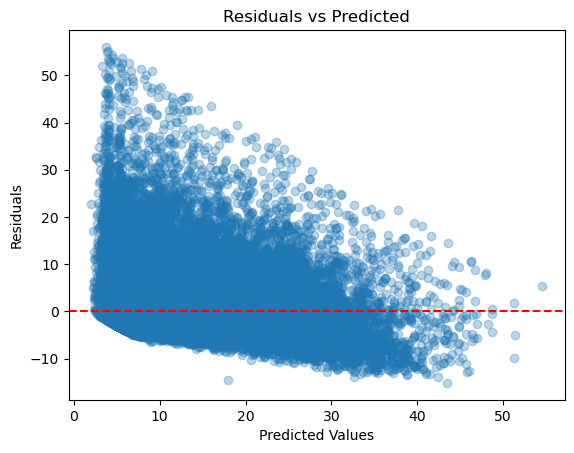

In [88]:
residuals = y_test - y_pred

import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


Residuals very highly dispersed initially. They do not appear to be distributed about 0 before predicted value of 25. Once the predicted value climbs to past 25 it seems that the residuals are distributed about 0. This implies that linear regression model assumtion that error is distributed around zero is violated. 

Implementation of ridge regression with cross validation 
We use cross validation as a method for fine-tuning hyper parameter $$\alpha$$

In [89]:
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-3, 3, 50)
modelRidge = RidgeCV(alphas=alphas, cv=5)
modelRidge.fit(x_train, y_train)

print("R^2 value is:", modelRidge.score(x_train, y_train))
print("Best alpha:", modelRidge.alpha_)

R^2 value is: 0.6245176463069797
Best alpha: 0.3727593720314938


In [94]:
y_predRidge = modelRidge.predict(x_test)
mse_Ridge = mean_squared_error(y_test, y_predRidge)
print("MSE:", mse_Ridge)

rmse_Ridge = mean_squared_error(y_test, y_predRidge, squared = False)
print("RMSE:", rmse_Ridge)

MSE: 19.618940929656574
RMSE: 4.429327367632311


Implementation of Lasso Regression with cross validation. 

In [96]:
from sklearn.linear_model import LassoCV

alphas_Lasso = np.logspace(-4, 1, 50)

model_Lasso = LassoCV(alphas=alphas_Lasso, cv=5)
model_Lasso.fit(x_train, y_train)
print("R^2 value is:", model_Lasso.score(x_train, y_train))

print("Best alpha:", model_Lasso.alpha_)

R^2 value is: 0.6245103551786927
Best alpha: 0.0001


In [98]:
y_predLasso = model_Lasso.predict(x_test)
mse_Lasso = mean_squared_error(y_test, y_predLasso)
print("MSE:", mse_Lasso)

rmse_Lasso = mean_squared_error(y_test, y_predLasso, squared = False)
print("RMSE:", rmse_Lasso)

MSE: 19.61894633251429
RMSE: 4.429327977528227
